# DATA 1 Practical 6

Simos Gerasimou


## A Data Journey Through The Titanic

On April 15, 1912, during her maiden voyage from Southampton to New York, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg ([Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic)). As it was considered “unsinkable”, the Titanic did not carry enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

**DataVision** has been commissioned by Her Majesty The Queen to investigate the conditions in which people survived and whether this was because of luck or whether some groups were more likely to survive than others. If discrimination due to gender or socio-economic class is identified, the Queen intends to use this information to change the cruise policies accordinly. 

#### Your tasks are to explore this dataset and generade some actionable knowledge. 


#### This Jupyter Notebook will be presented to  the House of Commons  who have limited knowledge about data science. So, your findings should be complemented by a suitable justification explaining what you observe and, when applicable, what does this observation  mean and, possibly, why it occurs.

* For each question (task) a description is provided accompanied (most of the time) by two cells: one for writing the Python code and another for providing the justification. Feel free to add more cells if you feel they are needed, but keep the cells corresponding to the same question close by.

#### Note: You are advised to use Pandas. For the visualisation, you can use Pandas, Matplotlib or Seaborn.

To answer these exercises, you should first read:

(1)  Chapter 3: Dapa Manipulation with Pandas from the Python Data Science Handbook** (https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)

(2) Chapter 4: Visualization with Matplotlib (https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)



* Seaborn API: https://seaborn.pydata.org/api.html

***

### Part 1: Reading dataset


The Titanic dataset is available on VLE (look for titanicFull.csv in the Practicals section)

Before doing the tasks below, you may want to explore the dataset using a spreadsheet editor (e.g., Excel) to get a high-level view of the dataset.

**T1) Load the Titanic dataset using Pandas**

**Note**: You have to download the dataset on your local machine and then load it onto the Jupyter Notebook

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file = "titanicFull.csv"
df = pd.read_csv(file) 

***

### Part 2: Cleaning the dataset

**T2i) Print the first 4 records of the dataset**

In [3]:
df.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S


**T2ii) Print the last 6 records of the dataset**

In [4]:
df.tail(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S


**T3) Get general info about the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


**T4) Explore the dataset and try to understand the meaning of each variable (column). Identify which variables are categorical and which are numerical.**

**Note**: Inferring the meaning of variables 'Pclass', 'SibSp', 'Parch' could be challenging; think of what is missing from the dataset and what types of people were travelling on the Titanic. If you find it more difficult, the answer is at the end of this notebook

pclass = passenger's class
survived = survival
name = passenger's name
sex = passenger's sex
age = passenger's age
sibsp = passenger's no. of siblings/spouses on board
parch = passenger's no. of parents/children on board
ticket = passenger's ticket no.
fare = passenger's fare
cabin = passenger's cabin no.
embarked = passenger's port of embarkation

**T5) Get the shape of the dataframe**

In [7]:
df.shape

(1309, 11)

**T6) Get the name of the columns for the dataframe**

In [8]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

**T7) Do you think the columns (variables) need to be more readable? In particular, those that you might have found difficult to understand in T4**

In [9]:
df.rename(index=str, columns={"pclass":"ticketClass", "sibsp":"siblingsSpouses", "parch":"parentsChildren"}, inplace=True)
df.columns

Index(['ticketClass', 'survived', 'name', 'sex', 'age', 'siblingsSpouses',
       'parentsChildren', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

**T8) Are there any duplicated records?**

In [10]:
duplicated = df.duplicated().sum()
print(duplicated)

0


**T9) Copy the dataset so that you manipulate the copied dataset and leave the original unaffected**

**Hint**: Check the pandas documentation for help on how to copy the dataframe

In [11]:
dff = df.copy()

**T10) Create a new dataframe in which**
* **a Missing variable (column) indicates the number of missing data for each variable in the titanic dataset**
* **a Percentage variable indicates the percentage of the missing data over the size of the titanic dataset**

**Print the records in this new dataframe sorted in descending order**

In [13]:
missingDataSummary    = dff.isna().sum()
missingDataPercentage = (dff.isna().sum()/dff.shape[0])
missingData = pd.concat([missingDataSummary, missingDataPercentage], axis=1, keys=['Missing', 'Percentage'])
missingData.sort_values(ascending=False, by='Missing')

,Missing,Percentage
cabin,1014,0.774637
age,263,0.200917
embarked,2,0.001528
fare,1,0.000764
ticketClass,0,0.000000
survived,0,0.000000
name,0,0.000000
sex,0,0.000000
siblingsSpouses,0,0.000000
parentsChildren,0,0.000000


**T11) What should we do with the variable with the highest number of missing data. Consider the amount of missing data compared to the total number of available data.**

In [14]:
dffClean = dff.drop(columns='cabin')
dffClean.isna().sum().sort_values(ascending=False)

age                263
embarked             2
fare                 1
ticket               0
parentsChildren      0
siblingsSpouses      0
sex                  0
name                 0
survived             0
ticketClass          0
dtype: int64

**T12) Impute the categorical variable (just one) with the mode value**


In [15]:
dffClean['embarked'] = dffClean['embarked'].fillna(dffClean['embarked'].mode()[0])
dffClean.isna().sum().sort_values(ascending=False)

age                263
fare                 1
embarked             0
ticket               0
parentsChildren      0
siblingsSpouses      0
sex                  0
name                 0
survived             0
ticketClass          0
dtype: int64

**T13i) Plot the histogram of the numeric variable with the largest number of missing data so as to determine the best value to fill in the missing data. Add suitable title and axis names.**

**Note: You may want to use the native Pandas visualisation, matplotlib or seaborn**

**Hint**: Check the relevant section from the Python Data Science Handbook (https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html) or the Pandas documentation (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html)

C:\Users\jense\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jense\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Age (Count)')

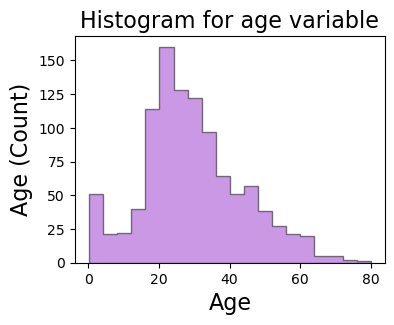

In [23]:
plt.figure(figsize=(4,3), dpi=100)
plt.hist(dffClean['age'], bins=20, density=False, alpha = 0.5,
         histtype='stepfilled', color='darkorchid', edgecolor='black')

plt.title("Histogram for age variable",fontsize=16)
plt.xlabel('Age',fontsize=16)                  # set x label
plt.ylabel('Age (Count)',fontsize=16,rotation=90) # set y label

**T13ii) Impute the numeric variable (just one) with an appropriate value**

* What value does it make sense to impute for this variable?


In [24]:
dffClean['age'] = dffClean['age'].fillna(dffClean['age'].median())
dffClean.isna().sum().sort_values(ascending=False)

fare               1
embarked           0
ticket             0
parentsChildren    0
siblingsSpouses    0
age                0
sex                0
name               0
survived           0
ticketClass        0
dtype: int64

**T13iii) Plot the histogram again for the variable from task T13 after imputation and observe how the distribution has changed.**

Text(0, 0.5, 'Age (Count)')

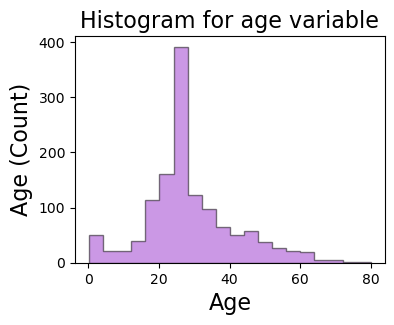

In [25]:
plt.figure(figsize=(4,3), dpi=100)
plt.hist(dffClean['age'], bins=20, density=False, alpha = 0.5,
         histtype='stepfilled', color='darkorchid', edgecolor='black')

plt.title("Histogram for age variable",fontsize=16)
plt.xlabel('Age',fontsize=16)                  # set x label
plt.ylabel('Age (Count)',fontsize=16,rotation=90) # set y label

**T14) What should you do about the missing value (one) of the final variable? Select the best imputation strategy and apply it**

**Hint:** You may want to consider additional factors and use a more sophisticated imputation strategy

In [26]:
ticketClass = dffClean[dffClean['fare'].isna()]['ticketClass']
if (len(ticketClass)>0):
  fareMedian = dffClean[dffClean['ticketClass']==ticketClass[0]]['fare'].median()
  dffClean['fare'] = dffClean['fare'].fillna(fareMedian)

**T15i) Save the cleaned dataframe as a csv file with name "titanicClean.csv"**

**Hint: Check the Pandas to_csv function**

In [27]:
file = "titanicClean.csv"
dffClean.to_csv(file, index=False)

**T15ii) Load the cleaned dataset into a new dataframe**

In [28]:
titanicClean = pd.read_csv(file)

***

### Part 3: Analysing the dataset

**T16) Get some descriptive statistics for the dataset selecting only the variables for which the descriptive statistics make sense**

In [29]:
titanicClean[['survived', 'age', 'siblingsSpouses', 'parentsChildren', 'fare']].describe()

,survived,age,siblingsSpouses,parentsChildren,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.381971,29.503186,0.498854,0.385027,33.276193
std,0.486055,12.905241,1.041658,0.865560,51.743584
min,0.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,80.000000,8.000000,9.000000,512.329200


**T17i) For each passenger, find out how many family members she/he has in total and store this information as a new variable in the dataframe**

In [30]:
titanicClean["familySize"] = titanicClean["siblingsSpouses"] + titanicClean["parentsChildren"] + 1

**T17ii) Print the records for the family with surname "Palsson" and confirm that the result from task T17i is correct**

In [31]:
titanicClean[titanicClean['name'].str.contains("Palsson")]

,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked,familySize
1096,3,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S,5
1097,3,0,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.075,S,5
1098,3,0,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,S,5
1099,3,0,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,S,5
1100,3,0,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,S,5


**T18): Find out and print the details of the biggest family on board**

**Hint: You may want to check https://en.wikipedia.org/wiki/Passengers_of_the_Titanic or https://titanicfacts.net/titanic-passenger-list**

Also read: https://en.wikipedia.org/wiki/Passengers_of_the_Titanic#Third_class

In [32]:
titanicClean[titanicClean['familySize']==max(titanicClean["familySize"])]

,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked,familySize
1170,3,0,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,S,11
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,S,11
1172,3,0,"Sage, Miss. Ada",female,28.0,8,2,CA. 2343,69.55,S,11
1173,3,0,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,S,11
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,S,11
1175,3,0,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,S,11
1176,3,0,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,S,11
1177,3,0,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,S,11
1178,3,0,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,S,11
1179,3,0,"Sage, Mr. John George",male,28.0,1,9,CA. 2343,69.55,S,11


**T19i) How was the ticket fare for class 1 distributed? Generate a boxplot and investigate whether there are any interesting insights**

**Hint**: You may want to check: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

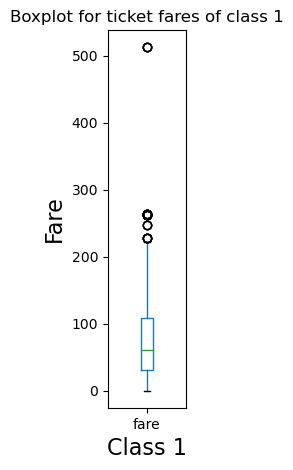

In [37]:
plt.figure(figsize=(1,5), dpi=100)
ax = titanicClean[titanicClean['ticketClass']==1].boxplot(column='fare')
ax.set_title("Boxplot for ticket fares of class 1")
ax.set_ylabel('Fare',fontsize=16,rotation=90) # set y label
ax.set_xlabel('Class 1',fontsize=16)
ax.grid(False)

**T19ii) Do you see any weird fare values? Check if there are any outliers for the ticket fares of class 1 using the standard deviation method.**

In [39]:
fareClass1 = titanicClean[titanicClean['ticketClass']==1]['fare']

fareStd   = np.std(fareClass1)
fareMean  = np.mean(fareClass1) 

fareOutliers = fareClass1[(fareClass1 > fareMean + 3 *fareStd) | (fareClass1 < fareMean - 3 *fareStd)]
print(fareOutliers)

49     512.3292
50     512.3292
183    512.3292
302    512.3292
Name: fare, dtype: float64


**T19iii) Print the information for those passengers**

You can read the interesting story of the passengers and their families at:
- https://www.encyclopedia-titanica.org/titanic-survivor/charlotte-cardeza.html
- https://www.encyclopedia-titanica.org/titanic-survivor/annie-moore-ward.html


In [40]:
titanicClean[titanicClean['fare']==fareOutliers.iloc[0]]

,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked,familySize
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,2
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C,2
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,1


**T20) Given that Titanic stopped in three ports (C = Cherbourg, Q = Queenstown, S = Southampton) before departing from the UK, can we identify any patterns regarding the ports at which passengers embarked on the Titanic? Produce a bar plot to illustrate this**

**Hint:** You may want to check: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

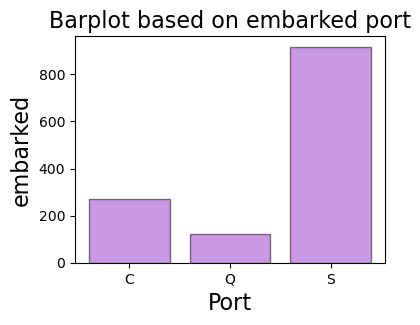

In [43]:
embarked = titanicClean.groupby('embarked').count()['ticketClass']
plt.figure(figsize=(4,3), dpi=100)

plt.bar(embarked.index, embarked, color='darkorchid', alpha = 0.5, edgecolor='black')
plt.title("Barplot based on embarked port", fontsize=16)
plt.xlabel('Port',fontsize=16) # set x label
plt.ylabel('embarked',fontsize=16,rotation=90) # set y label
ax.grid(False)

### Brain Teaser
**Generate a new column 'Title' that includes the title of each passenger and has only the following entries:**
* Master, Miss, Mr, Mss 

where
* Miss includes also Mlle and Ms
* Mme includes also Mrs
* all the remaining titles become Rare

In [ ]:
#Write your answer here


In [ ]:
# Answers to T4
# - Pclass     Ticket class	     
# - SibSp      # of siblings/spouses aboard the Titanic
# - Parch      # of parents / children aboard the Titanic